<a href="https://colab.research.google.com/github/umesh-thatikonda/MissionRnD_python-course/blob/master/802ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random as rnd
import plotly.express as px
import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [2]:
df = pd.read_csv(r'/content/abalone.csv')

In [3]:
# Changing the column names for better readability
newCols = list(map(lambda x : x.lower().replace(' ', '_'), df.columns))

df.columns = newCols

In [4]:
df.info() # Checking the columns meta deta

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
# CHecking for null values
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [6]:
# Creation of age feature as directed in the assignment questions.
# add 1.5 to the rings count to get the age

df['Age'] = df['rings'] + 1.5
 
df.drop('rings', inplace=True, axis=1) # Dropping rings feature as we have extracted age out from rings columns

In [7]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


It is observed that the minimum value for height is zero, which is most probably due to an error while data collection activity. We will investigate this in the next steps and take appropriate measures

In [8]:
df[df['height']==0]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,Age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


There are only two records with height as zero this is definitely a error as diameter, wieghts are non zero. They can be dropped or the height can be replaced with median or median after checking the distribution of the height column

In [9]:
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [10]:
# see the distibution of hieghts information
fig = px.histogram(df, x="height", title="Distribution of height" )
fig.show()

##### After closly observing the distribution of the height data, which is nearly normal distributed. The zero height records can be replaced with mean of the height columns

In [11]:
df['height'][df['height'] == 0]=df.height.mean() # Replacing zero height with mean of height

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Univaraite Analysis

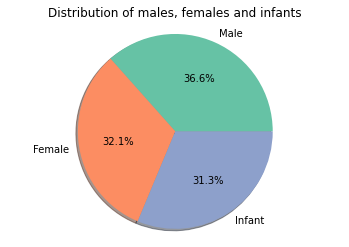

In [12]:
# pie chart of workers
labels = ['Male', 'Female', 'Infant']
sizes = df.sex.value_counts().tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title("Distribution of males, females and infants")
plt.show()

It is observed that the count of males, females and infants are almost equal, there is no clear domination of a specific gender types in the data

In [13]:

fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution for Height', "Whiscker plot for  height"))
fig.add_trace(go.Histogram(x=df['height']), row=1, col=1)
fig.add_trace(
    go.Violin(y=df['height'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Height')
    
    , row=1, col=2)

fig.show()


After looking at the distribution of the data and the box plot we can observe that the data is nearly normally distributed, has little outliers

In [14]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'Age'],
      dtype='object')

In [15]:

fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution for lenght', "Whiscker plot for  length"))
fig.add_trace(go.Histogram(x=df['length']), row=1, col=1)
fig.add_trace(
    go.Violin(y=df['length'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='length')
    
    , row=1, col=2)

fig.show()


The feature length, We observe that the data is left skewed and has few outliers

In [16]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'Age'],
      dtype='object')

In [17]:

fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution for diameter', "Whiscker plot for  diameter"))
fig.add_trace(go.Histogram(x=df['diameter']), row=1, col=1)
fig.add_trace(
    go.Violin(y=df['diameter'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Diameter measuremnet')
    
    , row=1, col=2)

fig.show()


For the feature "Diameter", the data is nominally left skewed and by observing the whisker plot, we can confirm that it is having no outliers. Therefore might not have a negative impact on the statistical modelling built using the data

In [18]:

fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution for Age', "Whiscker plot for  Age"))
fig.add_trace(go.Histogram(x=df['Age']), row=1, col=1)
fig.add_trace(
    go.Violin(y=df['Age'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Age')
    
    , row=1, col=2)

fig.show()


The Response variable "Age", almost closelt normal distributed has skewness towards right side but not significance though. We shall investigate this more in the further process

In [28]:
from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()



df['sex'] = labelencoder.fit_transform(df['sex'])
df


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


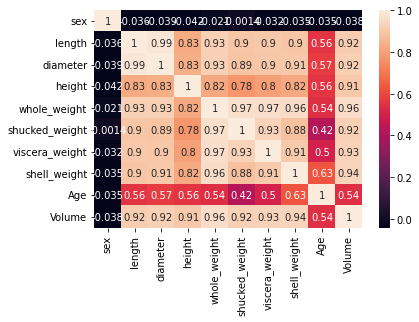

In [42]:

#ploting the heatmap for correlation
ax = sns.heatmap(df.corr(), annot=True)
plt.figure(figsize=(20,7))
sns.heatmap(data[numerical_features].corr(), annot=True)

In [30]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[list(df.columns[:-2])]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]



vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
2,739.869009,diameter
1,693.993499,length
4,142.755007,whole_weight
5,62.867903,shucked_weight
6,57.102315,viscera_weight
3,42.117620,height
0,2.552200,sex


Since we have to perform a regression, we have to investigate for multi colinearity in the data. The test for VIF would help us understand the colinearity between the features.



Generally, a VIF of less than 5 is safe number to assume less multi colinearity among the features.



almost all the features except "sex" show high colinearity among the features. Now either the features to be removed or the features to be transformed to avoid this multicolinearity. But the removal of features would some time lead to loss of information. We shall transform the features and again test for VIF

In [43]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'Age', 'Volume'],
      dtype='object')

In [64]:
df['volume'] = 2/3*3.14*df['diameter']*df['diameter']*df['height']

In [85]:
z = df[['height','sex', ,'shucked_weight']]

SyntaxError: ignored

In [86]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'Age', 'Volume', 'volume'],
      dtype='object')

In [87]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
vif_info['Column'] = z.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
2,47.201710,diameter
0,40.491567,height
3,8.680462,shucked_weight
1,2.456763,sex


After observing the features, there are 4 different types of weights "whole_weight", "shucked_weight", "viscera_weight" and "shel_weight" and these columns are very highly correlated to each other this can be understood by looking at the VIF table and correlation matrix. 

The lesser correlated columns are "height" and "sex". So the final chosen columns for the modelling excercise is "height", "sex" and "shucked_weight"




For better modelling performance, the age data is observed and a serate classed would be created based on the age count, minimum and maximum age values in the feature "age"

In [91]:
df.Age.value_counts().sort_index()

2.5       1
3.5       1
4.5      15
5.5      57
6.5     115
7.5     259
8.5     391
9.5     568
10.5    689
11.5    634
12.5    487
13.5    267
14.5    203
15.5    126
16.5    103
17.5     67
18.5     58
19.5     42
20.5     32
21.5     26
22.5     14
23.5      6
24.5      9
25.5      2
26.5      1
27.5      1
28.5      2
30.5      1
Name: Age, dtype: int64

After observing the value counts results for the "age" feature, three classes shall be created based on the age values.

class -> 0 when age is less than 10
class -> 1 when age is greater than 10 and less than 14
class -> 2 when age is greater than 14


In [ ]:
df['class'] = df['age'].apply(lambda x : 2 if x>15 else ( 1 if >10 and  ))